### Introduction to Nonlinear Dynamics HW1: Pratik Aghor
### Dynamics of 2x mod 1 map 

In [3]:
using LinearAlgebra
using Plots

In [4]:
f(x) = mod(2x, 1)

f (generic function with 1 method)

In [5]:
# check f(x)
@show f(3//5)
@show f(7//5)

f(3 // 5) = 1//5
f(7 // 5) = 4//5


4//5

In [48]:
# iterate f n times, given an initial condition x0
function fIter(f, x0, nIter)
    
    for i = 1:nIter
        print(f(x0), '\n')
        # update for iteration
        x0 = f(x0)
    end
end

fIter (generic function with 1 method)

In [49]:
fIter(f, 4//7, 7)

1//7
2//7
4//7
1//7
2//7
4//7
1//7


In [6]:
function plot2xmod1()
    # define x between 0 and 1
    nx = 100
    mid= Int64(nx/2)
    x = range(0.0, stop=1.0, length=nx)
    y = zeros(nx)
    y = f.(x) # dot is to apply f element-wise    
    plot(x[1:mid-1], y[1:mid-1], color=:blue, linewidth =:2)
    plot!(x[mid+1:nx-1], y[mid+1:nx-1], color=:blue, linewidth =:2)
    scatter!([x[1], x[mid+1], x[nx]], [y[1], y[mid+1], y[nx]], markercolor=:blue, markersize=8)
    scatter!([x[mid], x[nx-1]], [y[mid], y[nx-1]], markecolor=:blue, markersize=8)
    plot!(x, x, color=:red, linestyle =:dash, linewidth=:2)
    plot!(legend=false, xlabel="x",ylabel="f(x) = 2x mod 1", xlims=(-0.001,1.1), ylims=(-0.001,1.1))
    
end

plot2xmod1 (generic function with 1 method)

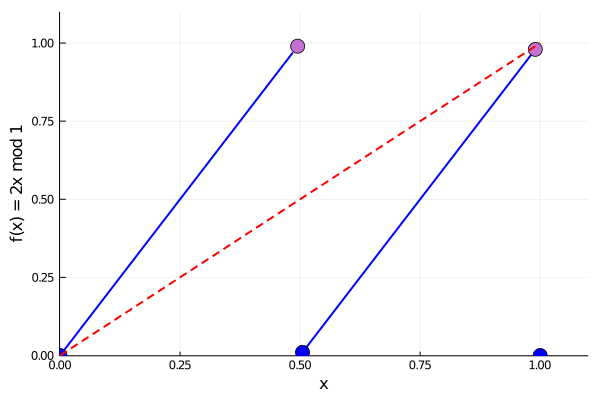

In [7]:
plot2xmod1()

In [43]:
function cobwebplot(f, x0, nIter)
    x = zeros(2*nIter+1)
    y = zeros(2*nIter+1)
    x[1] = x0
    y[1] = f(x0)
    for i=2:2*nIter+1
        x[i] = y[i-1]
        y[i] = f(x[i-1])
    end
    plot2xmod1()
    plot!(x, y, color=:black, linewidth =:2)
end

cobwebplot (generic function with 1 method)

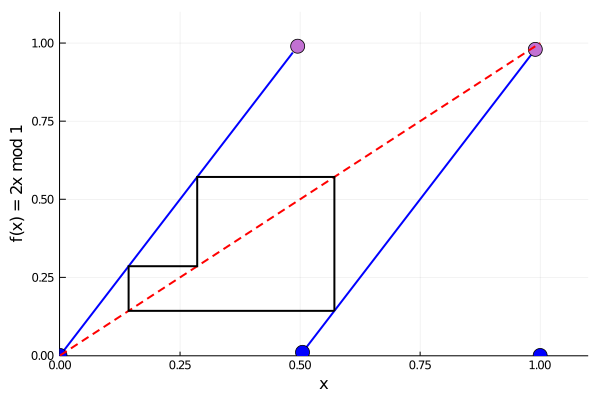

In [44]:
cobwebplot(f, 4//7, 3)

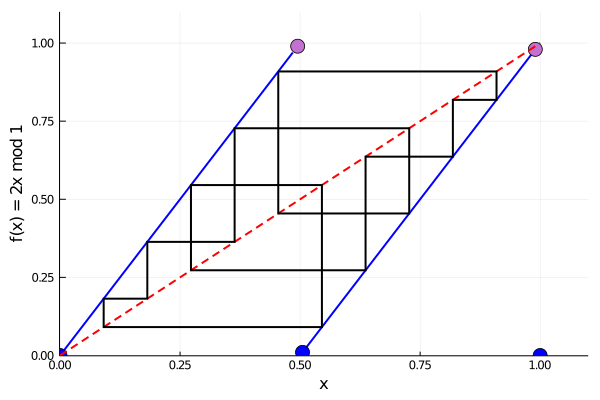

In [45]:
cobwebplot(f, 5//11, 10)

### Distinct periodic orbits upto period 4:

#### Period 1: trivial - (0)
#### Period 2:
* We know that 2x mod 1 map acts on binary numbers by shifting the sequence by 1 bit, dropping the 1's before the point.
* The only two options for a period-2 orbit are 0.01010101... and 0.10101010... and in fact, they change into one another under the action of 2x mod 1 map. 
* Therefore, there is only 1 period-2 orbit
* We must convert the binary string 0.010101... into rationals and then use cobwebplot function to plot the period-2 orbit.